# PlottingWithPandas

## This notebook was created to serve a [blog post]() by the same name.

In [1]:
# Python 3.7.3
import pandas as pd  # version 0.23.4

import matplotlib.pyplot as plt  # version 3.0.2
%matplotlib inline 

## 1. Setting up the Data:

#### Download and save data from Kaggle [Austin Animal Center Shelter Outcomes](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and#aac_shelter_outcomes.csv)

In [2]:
filename = "aac_shelter_cat_outcome_eng.csv"
df = pd.read_csv(filename, 
                 usecols=['name', 'date_of_birth', 'color'],
                 parse_dates=['date_of_birth'])
df.head()

,color,date_of_birth,name
0,orange,2014-07-07,NaN
1,blue /white,2014-06-16,Lucy
2,white/black,2014-03-26,*Frida
3,black/white,2013-03-27,Stella Luna
4,black/white,2013-12-16,NaN


## 2. Our Most Basic Plot

In [3]:
df['weekday_num'] = pd.DatetimeIndex(df['date_of_birth']).weekday
df['weekday_name'] = pd.DatetimeIndex(df['date_of_birth']).weekday_name
df.head()

,color,date_of_birth,name,weekday_num,weekday_name
0,orange,2014-07-07,NaN,0,Monday
1,blue /white,2014-06-16,Lucy,0,Monday
2,white/black,2014-03-26,*Frida,2,Wednesday
3,black/white,2013-03-27,Stella Luna,2,Wednesday
4,black/white,2013-12-16,NaN,0,Monday


In [4]:
df_grouped = df.groupby(['weekday_num', 'weekday_name']).size().reset_index(name="n_pets")
df_grouped

,weekday_num,weekday_name,n_pets
0,0,Monday,4584
1,1,Tuesday,4260
2,2,Wednesday,4243
3,3,Thursday,4048
4,4,Friday,3941
5,5,Saturday,3966
6,6,Sunday,4379


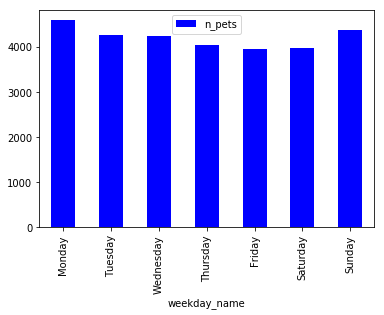

In [5]:
df_grouped.plot.bar(x="weekday_name", y="n_pets", color='blue');

## 3. The Birtday Surprise

[Basic statistics](https://en.wikipedia.org/wiki/Birthday_problem) show that in every group of 50 people (or pets) you have a 99% chance of having at least two people (pets) who were born on the same day of the year. 

Let's test this!

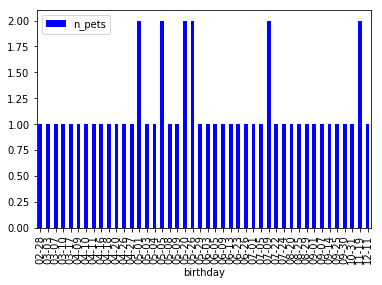

In [6]:
n_sample = 50
df_sample = df.sample(n=n_sample)
df_sample['birthday'] = df_sample['date_of_birth'].dt.strftime('%m-%d')
df_sample_grouped = df_sample.groupby(['birthday']).size().reset_index(name="n_pets")
df_sample_grouped.plot.bar(x="birthday", y="n_pets", color='blue');

## Ho my, the dates look all messed up... Let's try to sort this:

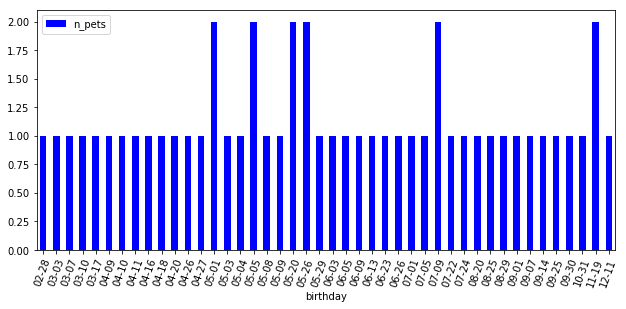

In [7]:
df_sample_grouped = df_sample.groupby(['birthday']).size()
n_unique_dates = len(df_sample_grouped.index.unique())
fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = df_sample_grouped.plot.bar(x="birthday", y="n_pets", color='blue')
ax.set_xticklabels(labels=df_sample_grouped.index, 
                   rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['n_pets']);
plt.tight_layout()

## 3. Let's plot according to animal color:

In [8]:
df['has_black'] = df['color'].str.contains("black")
df.head()

,color,date_of_birth,name,weekday_num,weekday_name,has_black
0,orange,2014-07-07,NaN,0,Monday,False
1,blue /white,2014-06-16,Lucy,0,Monday,False
2,white/black,2014-03-26,*Frida,2,Wednesday,True
3,black/white,2013-03-27,Stella Luna,2,Wednesday,True
4,black/white,2013-12-16,NaN,0,Monday,True


In [9]:
df_grouped_color = (df.groupby(['weekday_num', 'weekday_name'])['has_black']
                    .value_counts()
                    .unstack()
                    .reset_index(level=0, drop=True))
df_grouped_color

has_black,False,True
weekday_name,,
Monday,2802,1227
Tuesday,2575,1129
Wednesday,2618,1138
Thursday,2527,1049
Friday,2425,1000
Saturday,2417,1056
Sunday,2670,1162


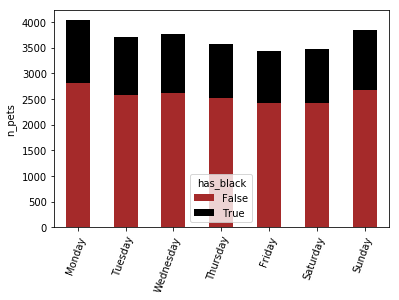

In [10]:
ax = df_grouped_color.plot.bar(stacked=True, color=['brown', 'black']);
ax.set_xticklabels(labels=df_grouped_color.index, 
                   rotation=70, rotation_mode="anchor", ha="right");
ax.set_xlabel('');
ax.set_ylabel('n_pets');